# Titanic Dataset Exploratory Data Analysis

#### Before starting out with the actual exploratory data analysis of the titanic data set, it is important that we import all the necessary libraries required for the task at hand.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### We'll import the dataset under the name "data" from the csv file that is stored on our system. This data will be loaded into the RAM, as we explore it.

In [6]:
data = pd.read_csv("C:\\Users\\HOME\\Downloads\\titanic_train.csv")

#### For viewing the initial few rows of the dataframe, head function is used.

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset typically includes the following information for each passenger:

Passenger Class (Pclass): Indicates the class of the ticket (1st, 2nd, or 3rd class).
Name: The name of the passenger.
Sex: The gender of the passenger.
Age: The age of the passenger.
SibSp: The number of siblings or spouses aboard.
Parch: The number of parents or children aboard.
Ticket: The ticket number.
Fare: The fare paid for the ticket.
Cabin: The cabin number.
Embarked: The port at which the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).

#### The describe function provides the values of various statiscal functions of all the numeric columns of the dataframe.

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The isnull() function() visualizes for us all the NULL values in the dataframe. This function is practically inefficient because the dataframe for thousands of rows, we cannot go checking each row for the presence of NULL values.

In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### From this we come to know that the column age and column cabin has a lot of null values and two values from embarked
### 1-Are there any missing values in the dataset?

In [11]:
data.isnull().sum().sum()

866

#### 2. What is the size of the dataset (number of rows and columns)?

In [12]:
data.shape

(891, 12)

there are a approx 900 rows in the dataset and arounf 700 rows are null in the 'cabin' column it is better to remove it from our analysis. As for the 'age' column around 200 rows are missing and these will be filled later on using some feature engineering.

In [13]:
data.drop('Cabin', axis=1, inplace=True)

In [14]:
data.shape

(891, 11)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Cabin column has been removed

#### 3. How many passengers survived, and how many did not?

In [16]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### This means that 342 people surived in the titanic and 549 didn't

In [17]:
total_survivors = data['Survived'].sum()
print("Total number of survivors:", total_survivors)


Total number of survivors: 342


Duplicating column in dataset

In [18]:
data['Survived_string'] = data['Survived']

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_string
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [20]:
data.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Embarked            object
Survived_string      int64
dtype: object

In [21]:
data['Survived_string'] = data['Survived_string'].astype(str)

In [22]:
data.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Embarked            object
Survived_string     object
dtype: object

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_string
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### 4.How many people surived on the basis of gender?

In [24]:
data.groupby(['Sex'], as_index=False)['Survived'].sum()

,Sex,Survived
0,female,233
1,male,109


#### confusion here is that how can we also get the people who did not survive

In [25]:
# data['Survived'] = data['Survived'].astype(str)

### 5.How does the survival rate vary with gender?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

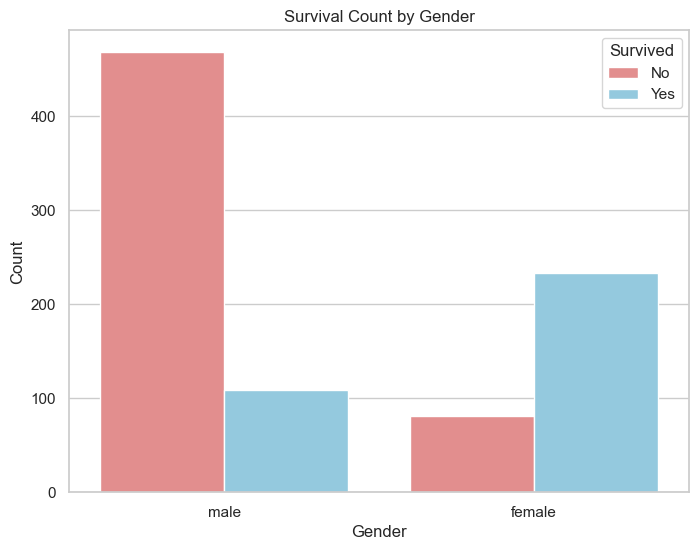

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived_string', palette=['#f08080', '#87CEEB'])

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Count by Gender")

plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Hence, we have learned that when it comes to survival rate, males most of the females survived and most males did not.

Now check the survival rate with respect to pclass

In [27]:
data.groupby(['Pclass'], as_index=False)['Survived'].sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


#### from this, we have learned that the passenger class of 1 that is more for the rich people. they are the highest in number with regards to the survival rate. and those who belonged to the 3rd class, they had the lowest survival rate

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

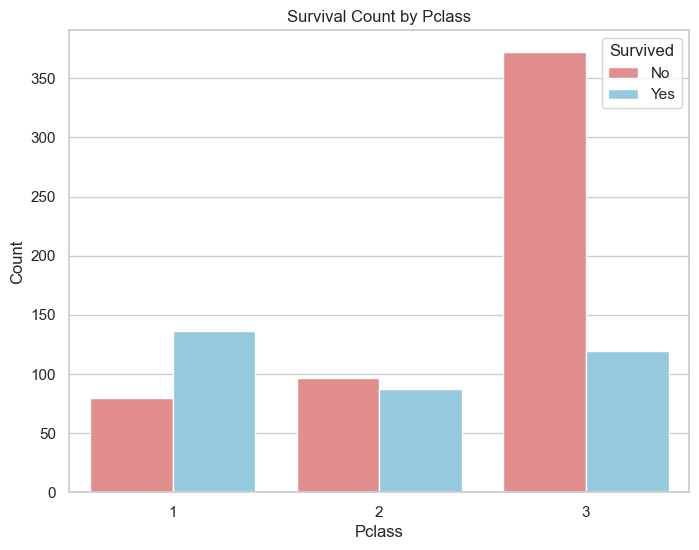

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived_string', palette=['#f08080', '#87CEEB'])

plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survival Count by Pclass")

plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

now  check with respect to both gender and pclass

In [29]:
ss = data.groupby(['Pclass', 'Sex'], as_index=False)['Survived'].sum()
ss

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


In [30]:
ss.dtypes

Pclass       int64
Sex         object
Survived     int64
dtype: object

### What is the distribution of survival by passenger class and gender?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

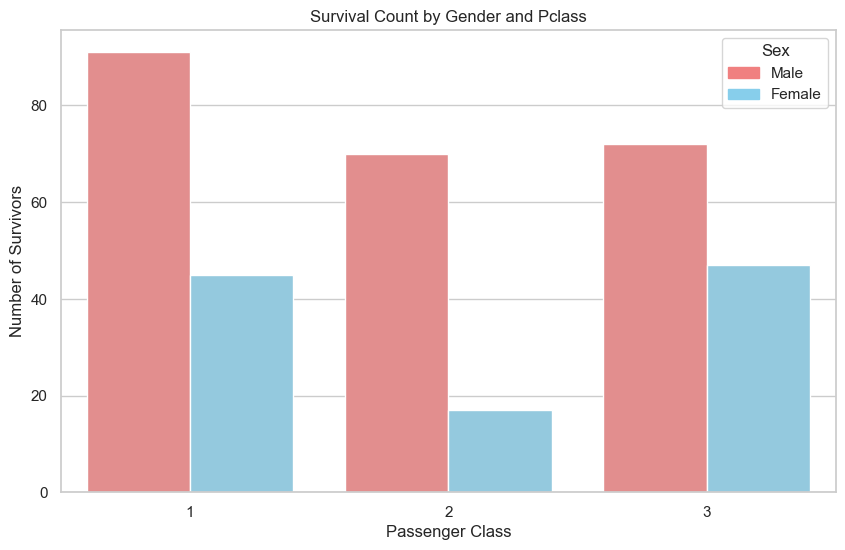

In [31]:
ss['Pclass'] = ss['Pclass'].astype(str)
ss['Sex'] = ss['Sex'].astype(str)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette(['#f08080', '#87CEEB'], len(ss['Sex'].unique()))  # Generate a palette with the same number of unique 'Sex' values

ax = sns.barplot(data=ss, x='Pclass', y='Survived', hue='Sex', palette=palette)

plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Gender and Pclass")

legend_labels = ["Male", "Female"]
legend_handles = [plt.Rectangle((0,0),1,1, color=palette[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title="Sex")

plt.show()

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_string
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [33]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create labels for age bins
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Cut the 'Age' column into bins
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Create a cross-tabulation (frequency distribution) of Age_Group and Survived
age_survived_freq = pd.crosstab(index=data['Age_Group'], columns=data['Survived'], margins=True, margins_name='Total')

# Display the frequency distribution
print(age_survived_freq)


Survived     0    1  Total
Age_Group                 
0-9         26   38     64
10-19       71   44    115
20-29      146   84    230
30-39       86   69    155
40-49       53   33     86
50-59       25   17     42
60-69       13    4     17
70+          4    1      5
Total      424  290    714


###  What is the distribution of passenger ages?

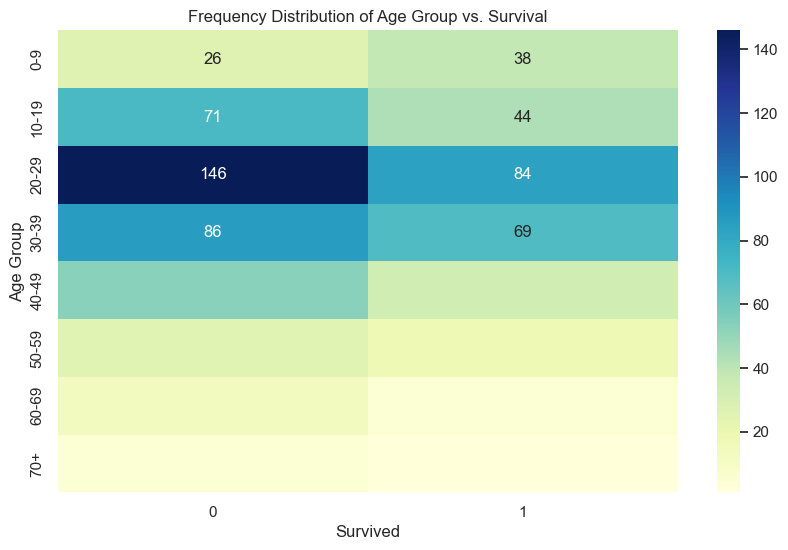

In [34]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

age_survived_freq = pd.crosstab(index=data['Age_Group'], columns=data['Survived'])

plt.figure(figsize=(10, 6))
sns.heatmap(age_survived_freq, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.xlabel("Survived")
plt.ylabel("Age Group")
plt.title("Frequency Distribution of Age Group vs. Survival")
plt.show()

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_string,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,30-39


What are the most common embarkation ports for passengers?

In [36]:
embarkation_counts = data['Embarked'].value_counts()

print("Most Common Embarkation Ports:")
print(embarkation_counts)

Most Common Embarkation Ports:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


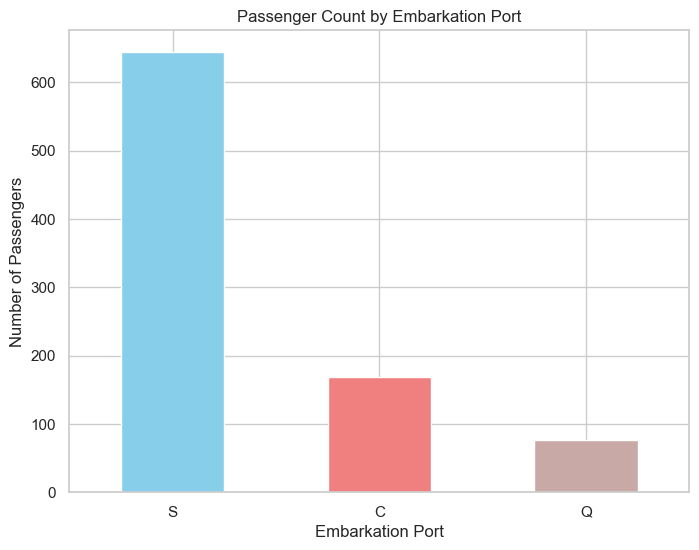

In [37]:
plt.figure(figsize=(8, 6))
embarkation_counts.plot(kind='bar', color=['skyblue', 'lightcoral', '#C9A9A6'])
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers")
plt.title("Passenger Count by Embarkation Port")
plt.xticks(rotation=0)
plt.show()

### What is the survival rate of passengers travelling alone and those who were travelling with family?

In [38]:
data['Alone'] = (data['SibSp'] == 0) & (data['Parch'] == 0)
survival_rates = data.groupby('Alone')['Survived'].mean()

print("Survival Rates:")
print(survival_rates)

Survival Rates:
Alone
False    0.505650
True     0.303538
Name: Survived, dtype: float64


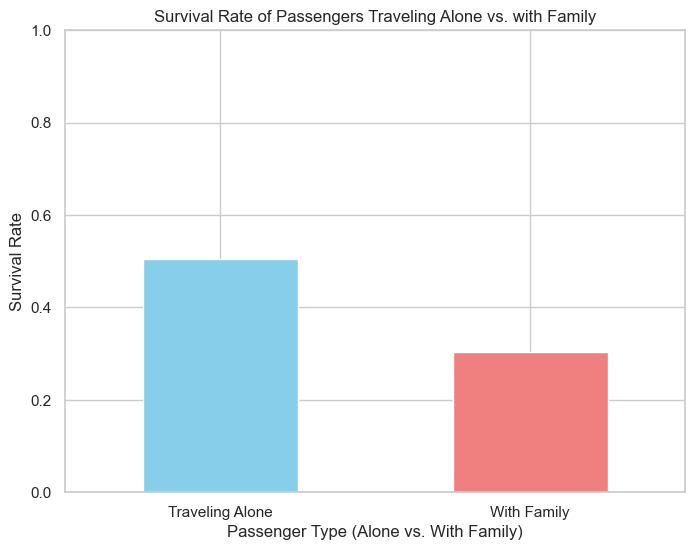

In [39]:
data['Alone'] = (data['SibSp'] == 0) & (data['Parch'] == 0)

survival_rates = data.groupby('Alone')['Survived'].mean()

plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel("Passenger Type (Alone vs. With Family)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Passengers Traveling Alone vs. with Family")
plt.xticks([0, 1], ['Traveling Alone', 'With Family'], rotation=0)
plt.ylim(0, 1)
plt.show()


What was the survival rate of the passengers based on the basis of Embarkation Port?

In [40]:
a = data.groupby('Embarked', as_index=False)['Survived'].value_counts()
print(a)

  Embarked  Survived  count
0        C         1     93
1        C         0     75
2        Q         0     47
3        Q         1     30
4        S         0    427
5        S         1    217


C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

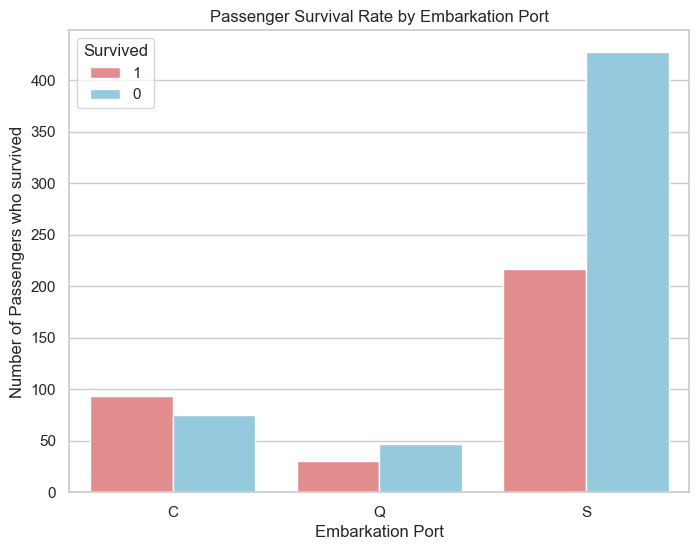

In [41]:
a['Survived'] = a['Survived'].astype(str)
plt.figure(figsize=(8, 6))
sns.barplot(data=a, x = 'Embarked', y = 'count', hue = 'Survived', palette=['#f08080', '#87CEEB'])
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers who survived")
plt.title("Passenger Survival Rate by Embarkation Port")
plt.show()

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_string,Age_Group,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,20-29,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,30-39,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,20-29,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,30-39,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,30-39,True


Does the fare relate to passenger class?

In [43]:
class_fare_stats1 = data.groupby('Pclass')['Fare'].describe()
class_fare_stats1

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


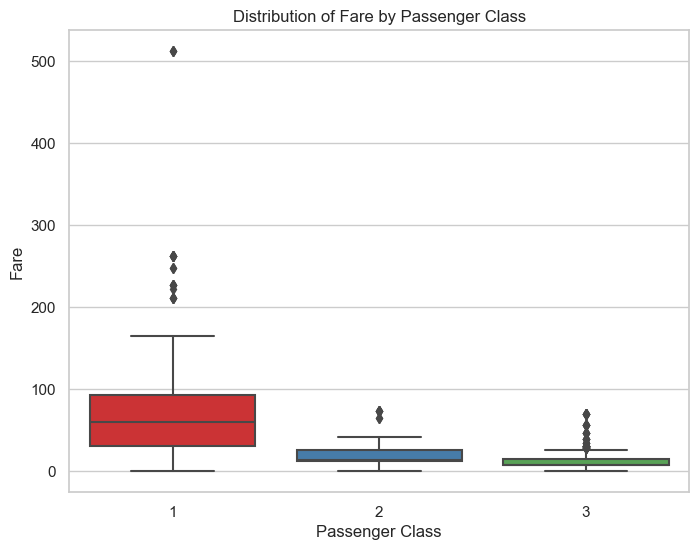

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pclass', y='Fare', palette='Set1')
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Distribution of Fare by Passenger Class")
# plt.ylim(0, 100)
plt.show()

Relationship between Embarked and Fare?

In [45]:
data.groupby('Embarked', as_index=False)['Fare'].describe()

,Embarked,count,mean,std,min,25%,50%,75%,max
0,C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
1,Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
2,S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


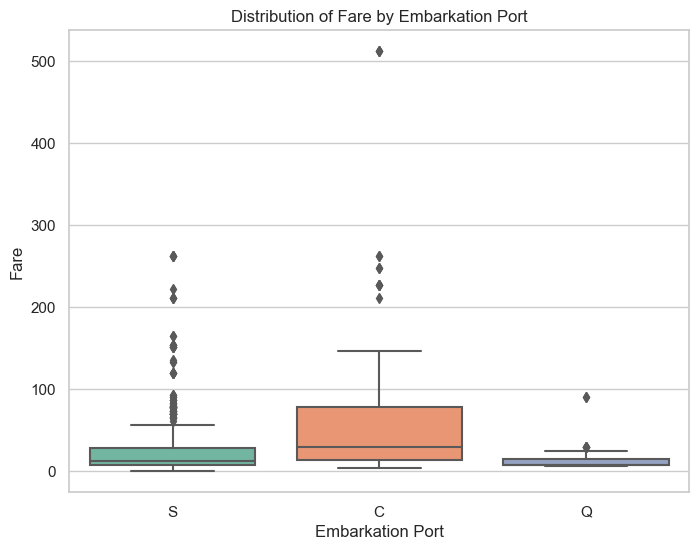

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Embarked', y='Fare', palette='Set2')
plt.xlabel("Embarkation Port")
plt.ylabel("Fare")
plt.title("Distribution of Fare by Embarkation Port")
plt.show()

Relationship bwtween Embarkation Port and Pclass

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_string,Age_Group,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,20-29,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,30-39,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,20-29,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,30-39,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,30-39,True


In [48]:
a1 = data.groupby(['Pclass'], as_index=False)['Embarked'].value_counts()
a1

,Pclass,Embarked,count
0,1,S,127
1,1,C,85
2,1,Q,2
3,2,S,164
4,2,C,17
5,2,Q,3
6,3,S,353
7,3,Q,72
8,3,C,66


In [49]:
a1.dtypes

Pclass       int64
Embarked    object
count        int64
dtype: object

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

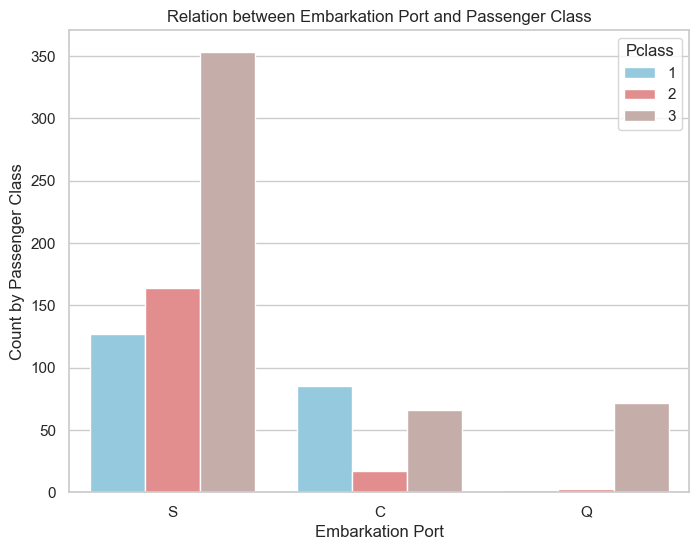

In [50]:
a1['Pclass'] = a1['Pclass'].astype(str)
plt.figure(figsize=(8, 6))
sns.barplot(data=a1, x='Embarked', y='count', hue='Pclass', palette = ['skyblue', 'lightcoral', '#C9A9A6'])
plt.xlabel("Embarkation Port")
plt.ylabel("Count by Passenger Class")
plt.title("Relation between Embarkation Port and Passenger Class")
plt.show()

### What is the relationship between cabin class and survival rate?

### 1-What is the relationship between age and survival rate, stratified by sex?


In [51]:
t_data = data

C:\Users\HOME\AppData\Local\Temp\ipykernel_5624\2667050042.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = t_data.groupby(['Sex', 'age_group'])['Survived'].mean().reset_index()
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

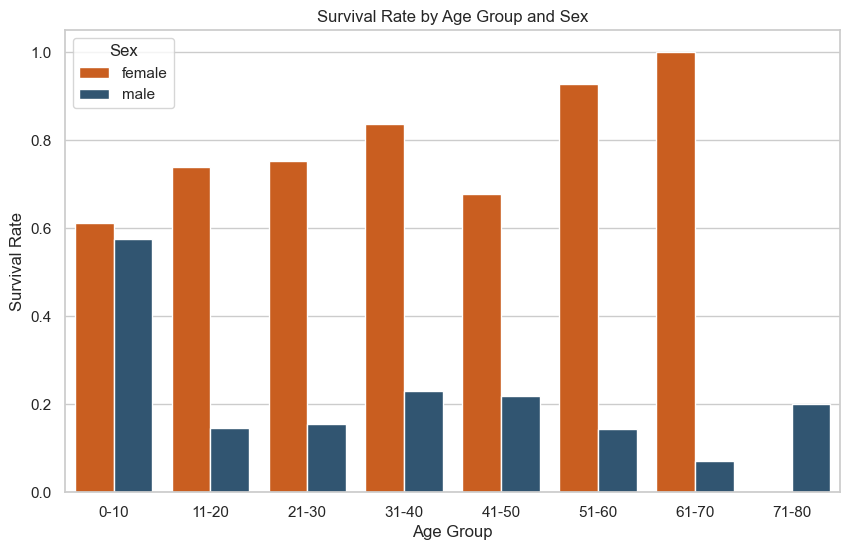

In [52]:
#  for males

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
t_data['age_group'] = pd.cut(t_data['Age'], bins=age_bins, labels=age_labels)
survival_rates = t_data.groupby(['Sex', 'age_group'])['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="age_group", y="Survived", hue="Sex", data=survival_rates,palette=["#E55604","#26577C"])
plt.title("Survival Rate by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()


### 2-What is the relationship between family size and survival rate, stratified by passenger class?


C:\Users\HOME\AppData\Local\Temp\ipykernel_5624\1744466879.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="family_size", y="Survived", hue="Pclass", data=t_data, palette=custom_colors ,ci = None)
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remove

<Figure size 640x480 with 0 Axes>

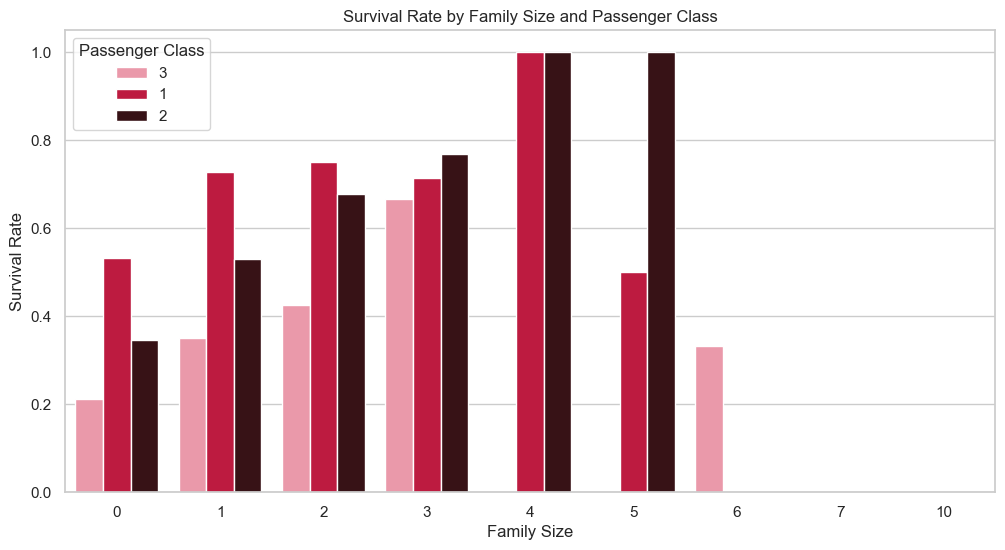

In [53]:
t_data['Pclass'] = t_data['Pclass'].astype('str')
t_data['family_size'] = t_data['SibSp'] + t_data['Parch']
plt.gcf().set_facecolor("#F9DEC9")
custom_colors = ["#F78CA2", "#D80032","#3D0C11"]
plt.figure(figsize=(12, 6))
sns.barplot(x="family_size", y="Survived", hue="Pclass", data=t_data, palette=custom_colors ,ci = None)
plt.title("Survival Rate by Family Size and Passenger Class")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.legend(title="Passenger Class")
plt.xticks(rotation=0)
plt.show()

* the survival rate was higher for passengers in higher cabin classes. 

* The survival rate for passengers in third class was particularly low.

### 3-How does the survival rate vary with passenger class?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


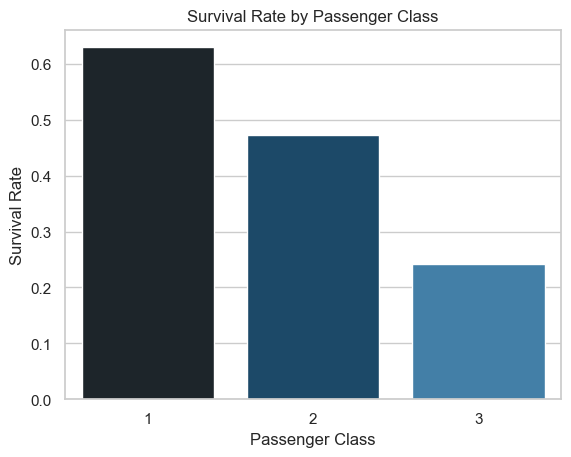

In [54]:
survival_rates = t_data.groupby('Pclass')['Survived'].mean().reset_index()

sns.barplot(data=survival_rates, x='Pclass', y='Survived', palette = ["#1B262C","#0F4C75","#3282B8"])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

### 4-What is the districution of Age for Survivors and non-survivors?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

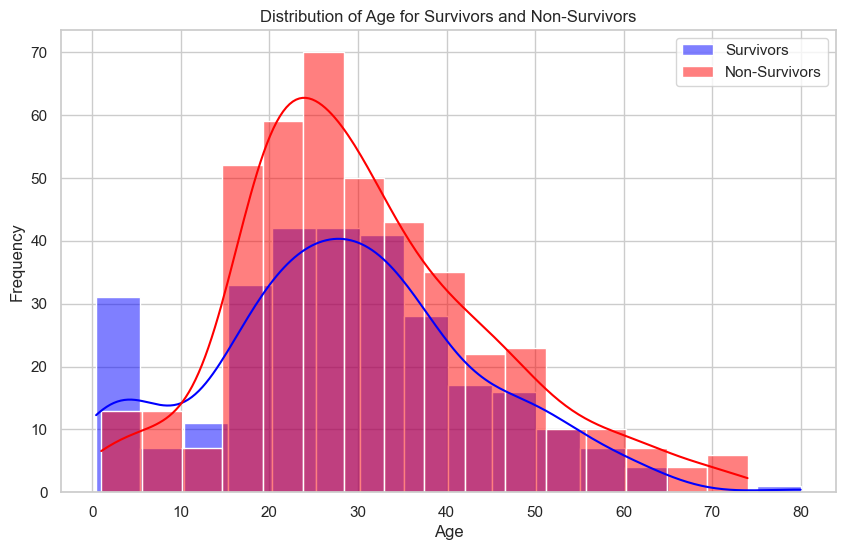

In [55]:
survivors = t_data[t_data['Survived'] == 1]['Age'].dropna()
non_survivors = t_data[t_data['Survived'] == 0]['Age'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(survivors, kde=True, label='Survivors', color='blue')
sns.histplot(non_survivors, kde=True, label='Non-Survivors', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Age for Survivors and Non-Survivors')
plt.show()

* We Clearly see that the Survivors are minimum in the Age group between 0 - 20 and 40 -70

* While the non-survivors are maximun between Age 20 - 35

### 5-What is the distribution of family size for survivors and non-survivors?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

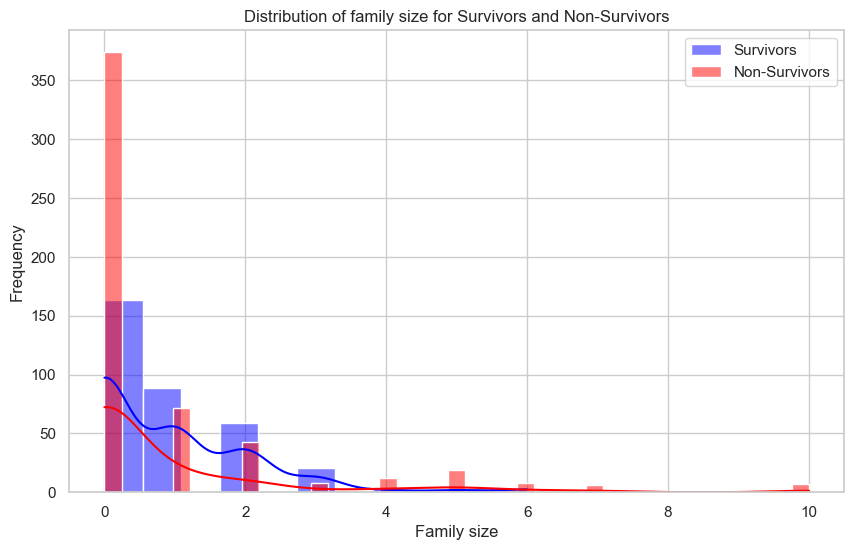

In [56]:
t_data['family_size'] = t_data['SibSp']+t_data['Parch']
survivors = t_data[t_data['Survived'] == 1]['family_size']
non_survivors = t_data[t_data['Survived'] == 0]['family_size']
plt.figure(figsize=(10, 6))
sns.histplot(survivors, kde=True, label='Survivors', color='blue')
sns.histplot(non_survivors, kde=True, label='Non-Survivors', color='red')
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of family size for Survivors and Non-Survivors')
plt.show()

*We clearly see that the lesser the family size the greater the non-survivors*

### 6-What is the distribution of fare for survivors and non-survivors?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


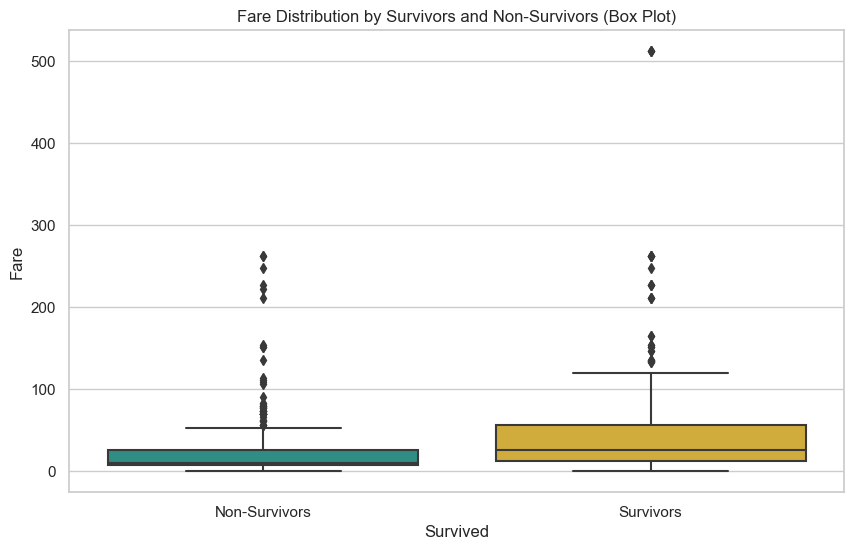

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=t_data, palette=['#219C90', '#E9B824'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survivors and Non-Survivors (Box Plot)')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

###  7-What is the relationship between family size and survival rate?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


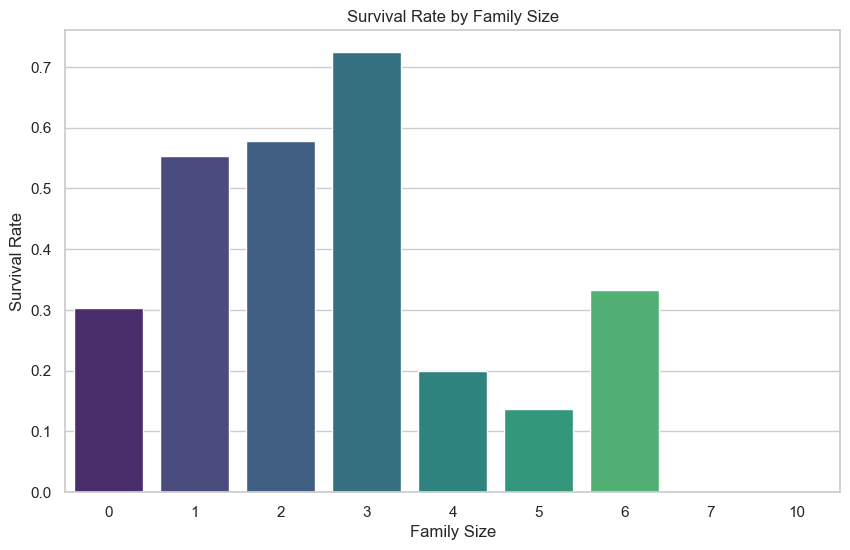

In [58]:

t_data['FamilySize'] = t_data['SibSp'] + t_data['Parch']

family_size_survival_rate = t_data.groupby('FamilySize')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_size_survival_rate, palette='viridis')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

*As we See that the family size of 1-3 has higher survival rate*

### Can you identify any subgroups of passengers who were particularly likely or unlikely to survive?


### 8-Are passengers with specific ticket prefixes more likely to survive?

In [59]:
t_data['TicketPrefix'] = t_data['Ticket'].str.extract(r'([A-Za-z]+)')

Survival Rate for Passengers with 'STON' Prefix: 0.44
Survival Rate for Passengers without 'STON' Prefix: 0.38


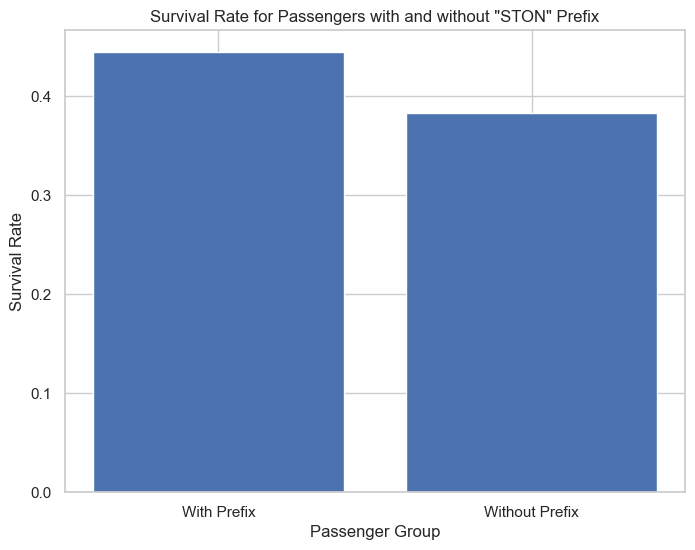

In [60]:
specific_prefix = 'STON'
t_data['HasSpecificPrefix'] = (t_data['TicketPrefix'] == specific_prefix).astype(int)
#we separeted the prefix we will analyze
survival_rate_with_prefix = t_data[t_data['HasSpecificPrefix'] == 1]['Survived'].mean()
survival_rate_without_prefix = t_data[t_data['HasSpecificPrefix'] == 0]['Survived'].mean()

print(f"Survival Rate for Passengers with '{specific_prefix}' Prefix: {survival_rate_with_prefix:.2f}")
print(f"Survival Rate for Passengers without '{specific_prefix}' Prefix: {survival_rate_without_prefix:.2f}")

plt.figure(figsize=(8, 6))
plt.bar(['With Prefix', 'Without Prefix'], [survival_rate_with_prefix, survival_rate_without_prefix])
plt.xlabel('Passenger Group')
plt.ylabel('Survival Rate')
plt.title(f'Survival Rate for Passengers with and without "{specific_prefix}" Prefix')
plt.show()

In [61]:
t_data.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,family_size,FamilySize,HasSpecificPrefix
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.904602,0.904602,0.020202
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,1.613459,1.613459,0.140770
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000,10.000000,1.000000


###  9-What is the average fare paid by passengers?

In [62]:
t_data['Fare'].mean()

32.204207968574636

### 10-What is the distribution of embarkation points (Embarked)?

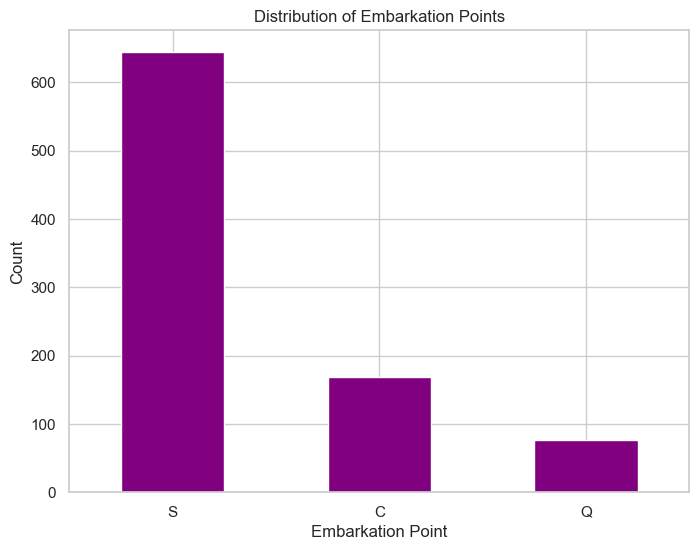

In [63]:
embarkation_counts = t_data['Embarked'].value_counts()

plt.figure(figsize=(8, 6))
embarkation_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Embarkation Points')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

### 11-What is the distribution of passenger titles (Mr., Mrs., Miss, etc.) based on names?

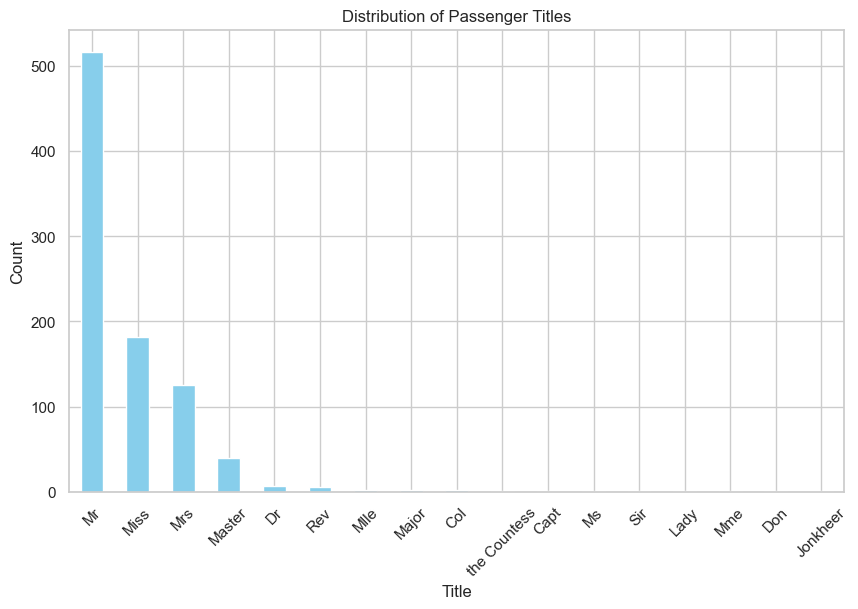

In [64]:
t_data['Title'] = t_data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
titles_count = t_data['Title'].value_counts()
plt.figure(figsize=(10, 6))
titles_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


###  12-What is the distribution of passengers in different age groups (e.g., children, adults, seniors)?

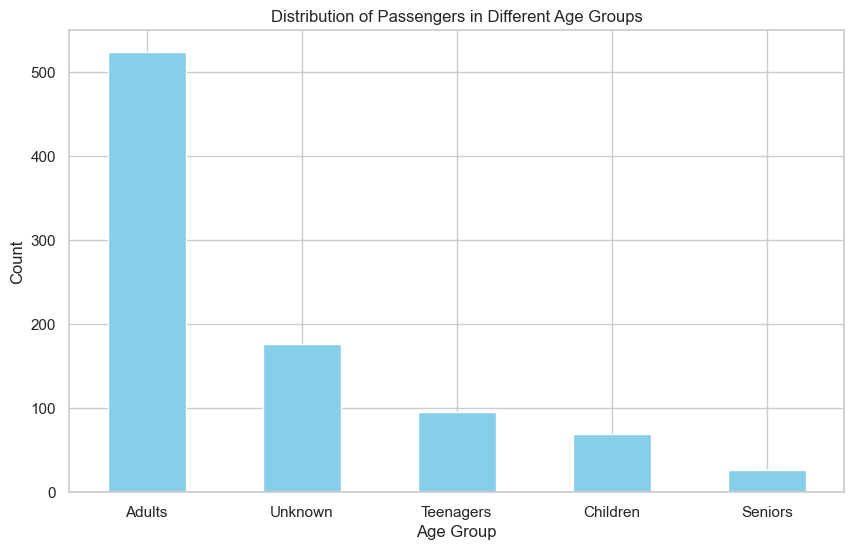

In [65]:
age_groups = {
    'Children': (0, 12),
    'Teenagers': (13, 19),
    'Adults': (20, 59),
    'Seniors': (60, 100)
}

def categorize_age(age):
    for group, (min_age, max_age) in age_groups.items():
        if min_age <= age <= max_age:
            return group
    return 'Unknown'

t_data['AgeGroup'] = t_data['Age'].apply(categorize_age)
age_group_counts = t_data['AgeGroup'].value_counts()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Passengers in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

###  13-Is there any correlation between passenger class and survival?

In [66]:
variable1 = t_data['Pclass']
variable2 = t_data['Survived']

correlation = variable1.corr(variable2)
print("The correlation between passenger class and survival is")
print(correlation)

The correlation between passenger class and survival is
-0.3384810359610148


#### There is strong negative correlation between pclass and survival

###  14-Is there any correlation between gender and survival?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


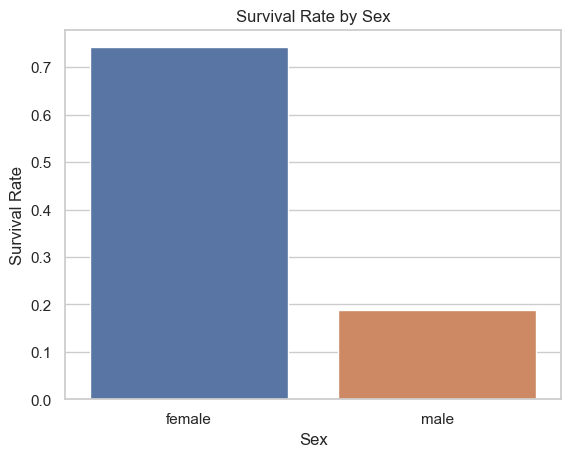

In [75]:
sex_survival = t_data.groupby('Sex')['Survived'].mean().reset_index()

sns.barplot(x='Sex', y='Survived', data=sex_survival)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

### 15-What is the distribution of ticket numbers?

In [76]:
t_data['TicketPrefix']

0         A
1        PC
2      STON
3       NaN
4       NaN
       ... 
886     NaN
887     NaN
888       W
889     NaN
890     NaN
Name: TicketPrefix, Length: 891, dtype: object

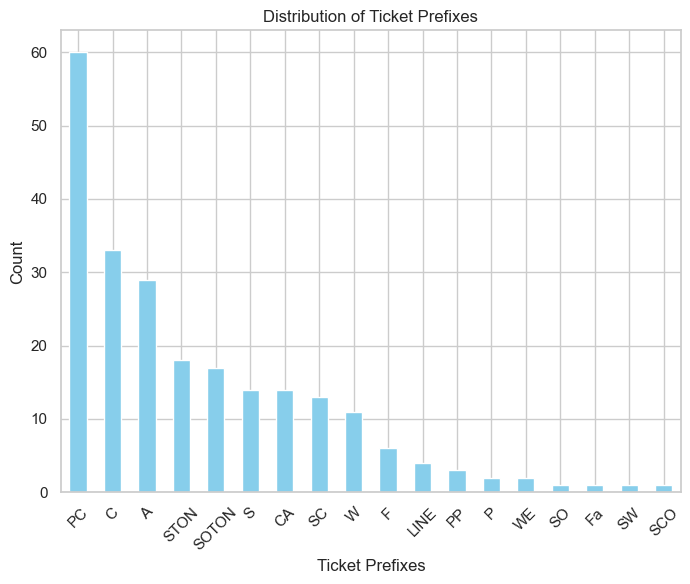

In [82]:

tickets_counts = t_data['TicketPrefix'].value_counts()

plt.figure(figsize=(8, 6))
tickets_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ticket Prefixes')
plt.xlabel('Ticket Prefixes')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

### 16-Is there any correlation between ticket numbers and survival?

### 17-What is the median fare within each passenger class?

In [84]:
median_fares = t_data.groupby('Pclass')['Fare'].median().reset_index()
print(median_fares)

  Pclass     Fare
0      1  60.2875
1      2  14.2500
2      3   8.0500


### 18-How many unique titles are there among passengers, and what are they?

In [85]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Group,Alone,age_group,family_size,FamilySize,TicketPrefix,HasSpecificPrefix,Title,AgeGroup,GenderCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,20-29,False,21-30,1,1,A,0,Mr,Adults,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,30-39,False,31-40,1,1,PC,0,Mrs,Adults,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,20-29,True,21-30,0,0,STON,1,Miss,Adults,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,30-39,False,31-40,1,1,NaN,0,Mrs,Adults,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,30-39,True,31-40,0,0,NaN,0,Mr,Adults,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,20-29,True,21-30,0,0,NaN,0,Rev,Adults,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,10-19,True,11-20,0,0,NaN,0,Miss,Teenagers,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,NaN,False,NaN,3,3,W,0,Miss,Unknown,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,20-29,True,21-30,0,0,NaN,0,Mr,Adults,NaN


In [94]:
titles = t_data['Title'].unique()
titles_count = t_data['Title'].nunique()
print("Number of Unique Titles:",titles_count)
print(" Unique Titles:",titles)

Number of Unique Titles: 17
 Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


### 19-How many passengers paid the same fare, and what is their survival rate?

In [96]:
fare_groups = t_data.groupby('Fare').agg({'Survived': ['count', 'mean']}).reset_index()
fare_groups.columns = ['Fare', 'PassengerCount', 'SurvivalRate']

print("Passengers with the Same Fare and Their Survival Rate:")
print(fare_groups)

Passengers with the Same Fare and Their Survival Rate:
         Fare  PassengerCount  SurvivalRate
0      0.0000              15      0.066667
1      4.0125               1      0.000000
2      5.0000               1      0.000000
3      6.2375               1      0.000000
4      6.4375               1      0.000000
..        ...             ...           ...
243  227.5250               4      0.750000
244  247.5208               2      0.500000
245  262.3750               2      1.000000
246  263.0000               4      0.500000
247  512.3292               3      1.000000

[248 rows x 3 columns]


### 20-Are there any outliers in the age distribution?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


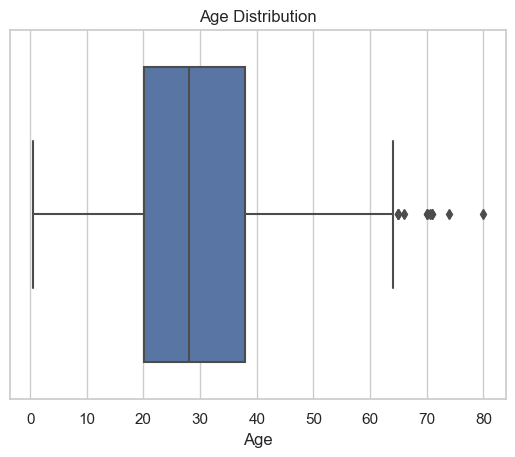

In [98]:
sns.boxplot(x=t_data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


### 21-Are there any outliers in the fare distribution?

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


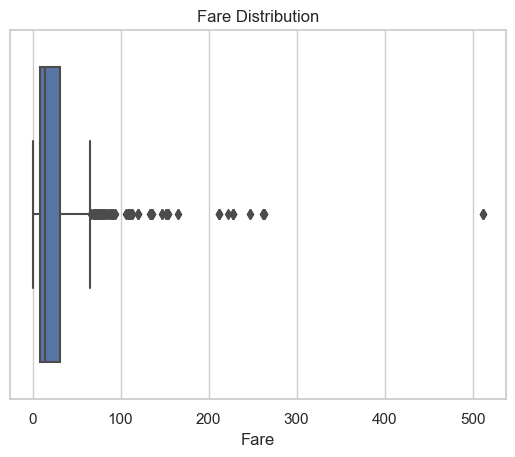

In [99]:
sns.boxplot(x=t_data['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

####  We noticed that one data point stands out as an extreme outlier significantly deviating from the central tendency of the fare distribution.